<a href="https://colab.research.google.com/github/pSenchua/Patient-health-assessment-app-with-server-integration./blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weather Prediction Using ML for Guwahati Dataset


1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


2. Load Dataset

In [ ]:
import glob, os

path = "/content/drive/MyDrive/Dataset"
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
print("Shape:", df.shape)
df.head()


Shape: (18627, 33)


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,guwahati,2012-01-01,22.4,8.3,15.0,22.4,7.2,14.9,9.6,72.2,...,12.4,6.0,NaN,2012-01-01T06:10:23,2012-01-01T16:42:04,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42410099999,remote"
1,guwahati,2012-01-02,17.1,8.7,13.5,17.1,7.9,13.4,10.5,83.0,...,7.4,3.0,NaN,2012-01-02T06:10:40,2012-01-02T16:42:44,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"42410099999,remote"
2,guwahati,2012-01-03,21.4,6.8,13.1,21.4,5.2,12.7,10.8,87.1,...,16.2,7.0,NaN,2012-01-03T06:10:55,2012-01-03T16:43:24,0.31,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"42410099999,remote"
3,guwahati,2012-01-04,21.4,5.1,11.9,21.4,3.3,11.3,8.7,82.4,...,15.5,7.0,NaN,2012-01-04T06:11:10,2012-01-04T16:44:06,0.34,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"42410099999,remote"
4,guwahati,2012-01-05,22.7,3.8,12.0,22.7,1.4,11.2,8.1,80.2,...,16.7,7.0,NaN,2012-01-05T06:11:22,2012-01-05T16:44:48,0.37,Clear,Clear conditions throughout the day.,clear-day,"42410099999,remote"


In [ ]:
# Overview of dataset
df.info()

# Summary statistics
df.describe(include='all').transpose()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18627 entries, 0 to 18626
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              18627 non-null  object 
 1   datetime          18627 non-null  object 
 2   tempmax           18581 non-null  float64
 3   tempmin           18581 non-null  float64
 4   temp              18581 non-null  float64
 5   feelslikemax      18581 non-null  float64
 6   feelslikemin      18581 non-null  float64
 7   feelslike         18581 non-null  float64
 8   dew               18581 non-null  float64
 9   humidity          18581 non-null  float64
 10  precip            18580 non-null  float64
 11  precipprob        18581 non-null  float64
 12  precipcover       18627 non-null  float64
 13  preciptype        7606 non-null   object 
 14  snow              3287 non-null   float64
 15  snowdepth         3317 non-null   float64
 16  windgust          3287 non-null   float6

,0
name,0
datetime,0
tempmax,46
tempmin,46
temp,46
feelslikemax,46
feelslikemin,46
feelslike,46
dew,46
humidity,46


In [ ]:
# Select only numeric columns (floats or ints)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

min_max = numeric_df.agg(['min', 'max']).T
min_max = min_max.rename(columns={'min': 'Minimum', 'max': 'Maximum'})
min_max
# To view neatly in Colab
from IPython.display import display

print("📊 Minimum and Maximum of All Numeric Parameters:\n")
display(min_max)


📊 Minimum and Maximum of All Numeric Parameters:



,Minimum,Maximum
tempmax,10.7,42.10
tempmin,-17.9,34.70
temp,0.8,35.50
feelslikemax,10.7,67.80
feelslikemin,-20.1,44.40
feelslike,-0.9,51.50
dew,-12.9,30.50
humidity,22.1,100.00
precip,0.0,387.80
precipprob,0.0,100.00


In [ ]:
# Convert datetime
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
year = int(input("Enter the year you want to display: "))
df_year = df[df['datetime'].dt.year == year]

print(f"Showing data for {year}: {df_year.shape[0]} records")
display(df_year.head())


Enter the year you want to display: 2022
Showing data for 2022: 365 records


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
14243,guwahati,2022-01-01,23.9,12.0,17.1,23.9,12.0,17.1,13.1,80.1,...,13.2,6.0,NaN,2022-01-01T06:10:33,2022-01-01T16:42:26,0.95,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42410099999,VEGT,remote,42516099999,4240909999..."
14244,guwahati,2022-01-02,25.0,11.1,17.2,25.0,11.1,17.2,13.3,80.4,...,15.2,7.0,NaN,2022-01-02T06:10:49,2022-01-02T16:43:07,0.98,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"42410099999,VEGT,42516099999,42512099999"
14245,guwahati,2022-01-03,24.4,12.2,17.7,24.4,12.2,17.7,14.0,81.6,...,14.3,6.0,NaN,2022-01-03T06:11:04,2022-01-03T16:43:48,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42410099999,VEGT,42414099999,42516099999,42409..."
14246,guwahati,2022-01-04,24.0,12.3,17.7,24.0,12.3,17.7,13.6,79.8,...,14.5,6.0,NaN,2022-01-04T06:11:18,2022-01-04T16:44:30,0.05,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42410099999,VEGT,42414099999,42516099999,42409..."
14247,guwahati,2022-01-05,25.0,11.8,17.9,25.0,11.8,17.9,13.1,76.7,...,14.4,6.0,NaN,2022-01-05T06:11:30,2022-01-05T16:45:12,0.08,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42410099999,VEGT,42414099999,remote,4251609999..."


Step 5: Data Cleaning

Drop irrelevant columns (textual fields not useful for ML).
Example: name, description, icon, stations, sunrise, sunset.

Handle missing values

Fill numeric with mean/median

Fill categorical with mode

Or drop if too many missing

In [ ]:
# Drop descriptive / irrelevant columns
drop_cols = ['name', 'description', 'icon', 'stations', 'sunrise', 'sunset']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Convert datetime
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Fill numeric columns with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Create binary rain target
df['RainToday'] = (df['precip'] > 0).astype(int)

print("✅ Missing values after cleaning:", df.isnull().sum().sum())


✅ Missing values after cleaning: 0


Step 6: Basic Analysis

Temperature distribution

Temperature and Rainfall over the years

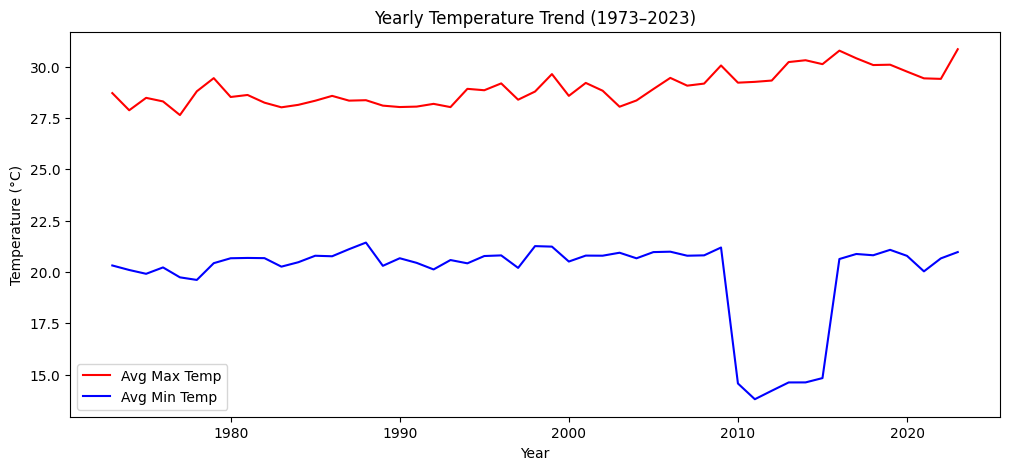

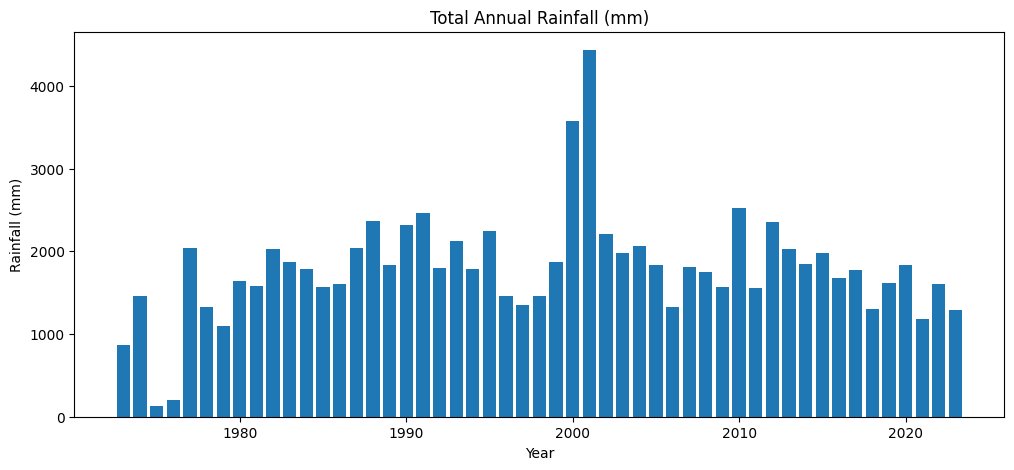

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['year'] = df['datetime'].dt.year


plt.figure(figsize=(12,5))
plt.plot(df.groupby('year')['tempmax'].mean(), label='Avg Max Temp', color='red')
plt.plot(df.groupby('year')['tempmin'].mean(), label='Avg Min Temp', color='blue')
plt.legend()
plt.title("Yearly Temperature Trend (1973–2023)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()

plt.figure(figsize=(12,5))
plt.bar(df.groupby('year')['precip'].sum().index, df.groupby('year')['precip'].sum().values)
plt.title("Total Annual Rainfall (mm)")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.show()


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

yearly_data = df.groupby('year').agg({
    'tempmax': 'mean',
    'tempmin': 'mean',
    'temp': 'mean',
    'precip': 'sum',
    'humidity': 'mean'
}).reset_index()

yearly_data.columns = ['Year', 'Avg_Max_Temp', 'Avg_Min_Temp', 'Avg_Temp', 'Total_Precipitation', 'Avg_Humidity']
display(yearly_data.head())


,Year,Avg_Max_Temp,Avg_Min_Temp,Avg_Temp,Total_Precipitation,Avg_Humidity
0,1973,28.713699,20.316712,24.504932,868.388,78.380548
1,1974,27.877534,20.096712,23.951781,1456.078,79.236986
2,1975,28.482192,19.910411,24.133425,129.100,77.646849
3,1976,28.307923,20.221585,24.184973,197.355,77.161202
4,1977,27.643836,19.738082,23.635616,2036.809,80.069315


In [ ]:
def plot_trend(data, x_col, y_col, title, y_label):
    plt.figure(figsize=(10,5))
    sns.lineplot(x=data[x_col], y=data[y_col], marker='o')
    plt.title(title, fontsize=13)
    plt.xlabel(x_col)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


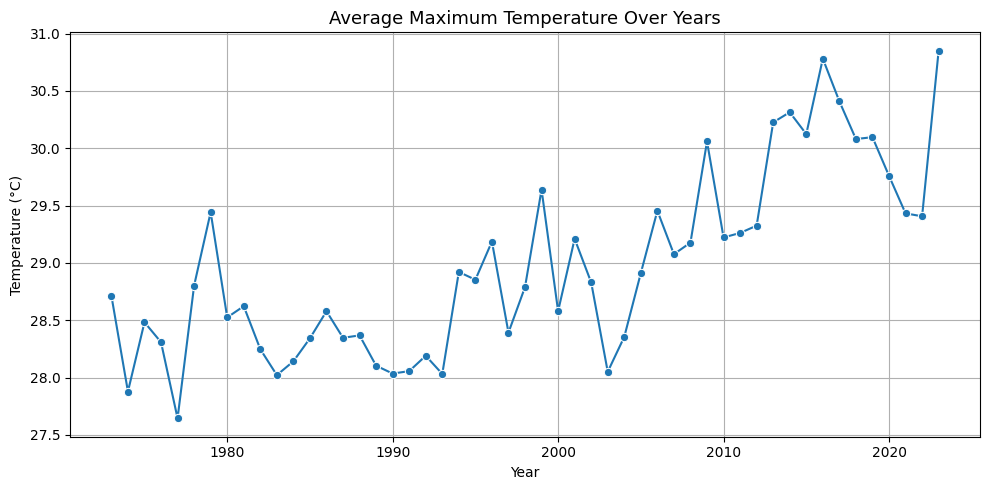

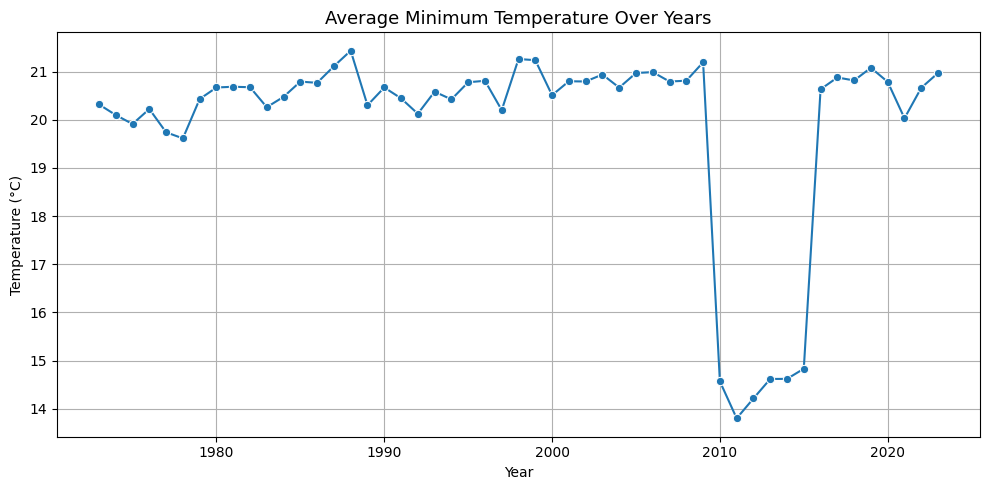

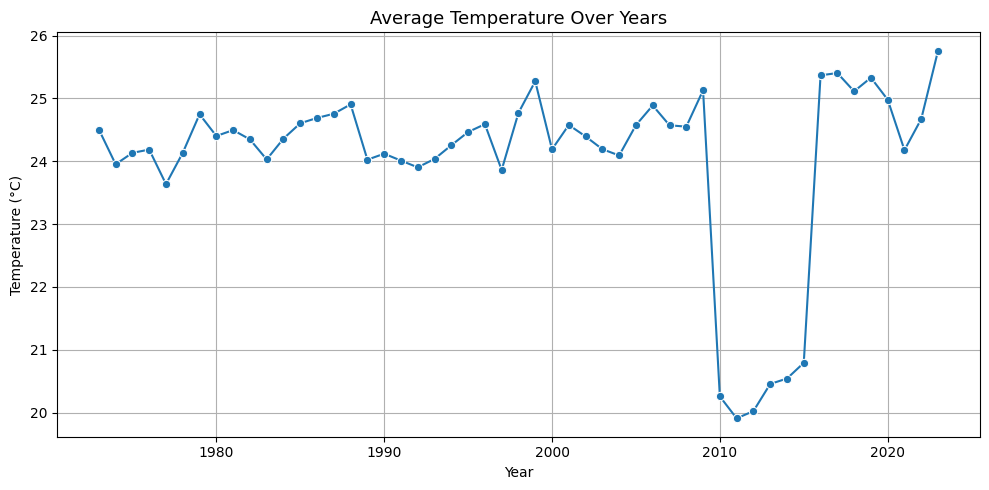

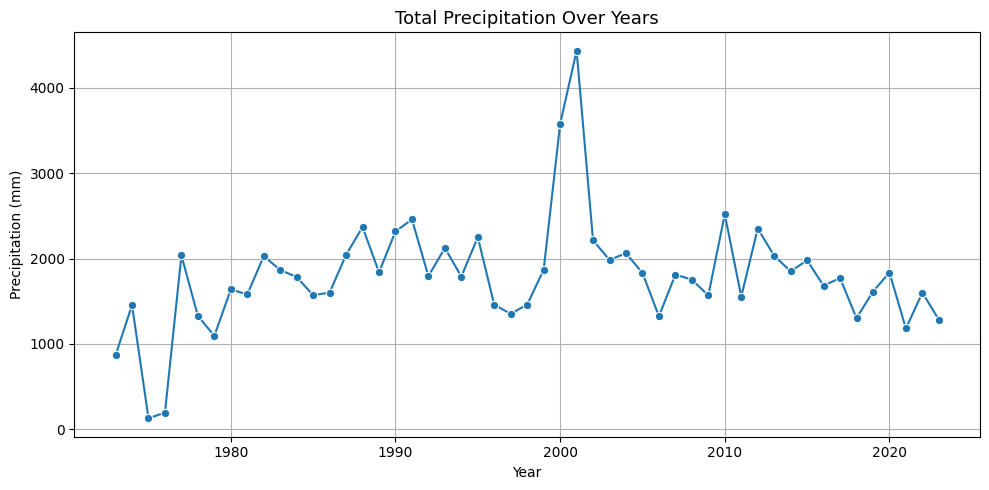

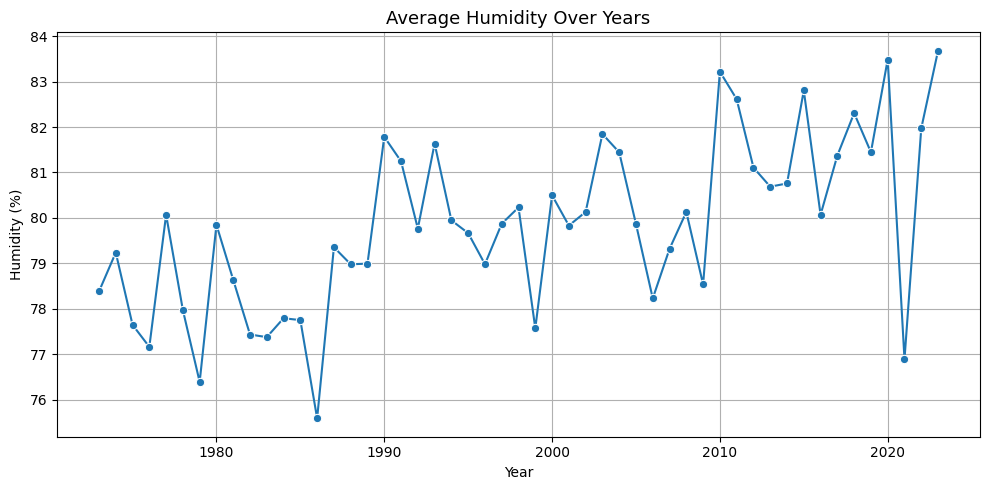

In [ ]:
plot_trend(yearly_data, 'Year', 'Avg_Max_Temp', 'Average Maximum Temperature Over Years', 'Temperature (°C)')
plot_trend(yearly_data, 'Year', 'Avg_Min_Temp', 'Average Minimum Temperature Over Years', 'Temperature (°C)')
plot_trend(yearly_data, 'Year', 'Avg_Temp', 'Average Temperature Over Years', 'Temperature (°C)')
plot_trend(yearly_data, 'Year', 'Total_Precipitation', 'Total Precipitation Over Years', 'Precipitation (mm)')
plot_trend(yearly_data, 'Year', 'Avg_Humidity', 'Average Humidity Over Years', 'Humidity (%)')


In [ ]:
df['day_month'] = df['datetime'].dt.strftime('%m-%d')
df['year'] = df['datetime'].dt.year

daily_data = df.groupby(['year', 'day_month']).agg({
    'tempmax': 'mean',
    'tempmin': 'mean',
    'temp': 'mean',
    'precip': 'sum',
    'humidity': 'mean'
}).reset_index()


In [ ]:
pivot_max_temp = daily_data.pivot(index='day_month', columns='year', values='tempmax')
pivot_min_temp = daily_data.pivot(index='day_month', columns='year', values='tempmin')
pivot_avg_temp = daily_data.pivot(index='day_month', columns='year', values='temp')
pivot_precipitation = daily_data.pivot(index='day_month', columns='year', values='precip')
pivot_humidity = daily_data.pivot(index='day_month', columns='year', values='humidity')


In [ ]:
!pip install plotly
import plotly.graph_objects as go

def plot_daily_trend_interactive(pivot_df, title, y_label):
    fig = go.Figure()

    for year in pivot_df.columns:
        fig.add_trace(go.Scatter(
            x=pivot_df.index,
            y=pivot_df[year],
            mode='lines',
            name=str(year)
        ))

    fig.update_layout(
        title=title,
        xaxis_title="Day of Year (MM-DD)",
        yaxis_title=y_label,
        template="plotly_white",
        width=900,
        height=500
    )
    fig.show()


In [ ]:
plot_daily_trend_interactive(pivot_max_temp, 'Daily Maximum Temperature Over Years', 'Temperature (°C)')
plot_daily_trend_interactive(pivot_min_temp, 'Daily Minimum Temperature Over Years', 'Temperature (°C)')
plot_daily_trend_interactive(pivot_avg_temp, 'Daily Average Temperature Over Years', 'Temperature (°C)')
plot_daily_trend_interactive(pivot_precipitation, 'Daily Total Precipitation Over Years', 'Precipitation (mm)')
plot_daily_trend_interactive(pivot_humidity, 'Daily Average Humidity Over Years', 'Humidity (%)')


Feature Selection

In [ ]:
# Drop the precip (rainfall) column from features to avoid leakage
features = ['tempmax', 'tempmin', 'humidity', 'dew', 'windspeed',
            'sealevelpressure', 'cloudcover']

X = df[features]
y = (df['precip'] > 0).astype(int)  # target


Handle Class Imbalance

In [ ]:
from sklearn.utils import resample

# Combine for resampling
data = pd.concat([X, y], axis=1)
majority = data[data['precip'] == 0]
minority = data[data['precip'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

balanced = pd.concat([majority, minority_upsampled])

# Separate again
X = balanced[features]
y = balanced['precip']


Split and Scale the Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train Random Forest Classifier

🔹 Random Forest Results
Accuracy: 0.8832248734634852

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      2789
           1       0.85      0.93      0.89      2743

    accuracy                           0.88      5532
   macro avg       0.89      0.88      0.88      5532
weighted avg       0.89      0.88      0.88      5532



<Figure size 500x500 with 0 Axes>

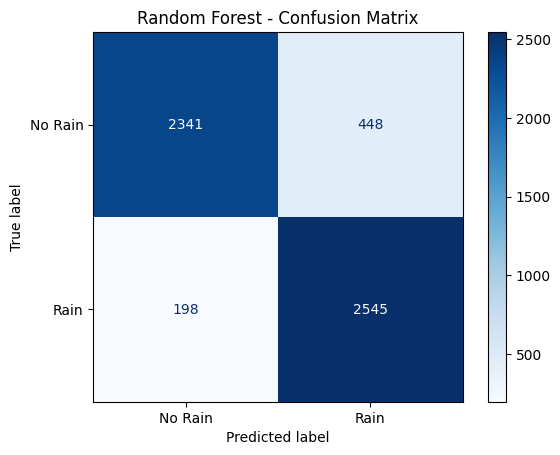

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Evaluation
print("🔹 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

# Visual Confusion Matrix
plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain", "Rain"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()


🔹 SVM Results
Accuracy: 0.8179681851048446

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      2789
           1       0.79      0.87      0.83      2743

    accuracy                           0.82      5532
   macro avg       0.82      0.82      0.82      5532
weighted avg       0.82      0.82      0.82      5532



<Figure size 500x500 with 0 Axes>

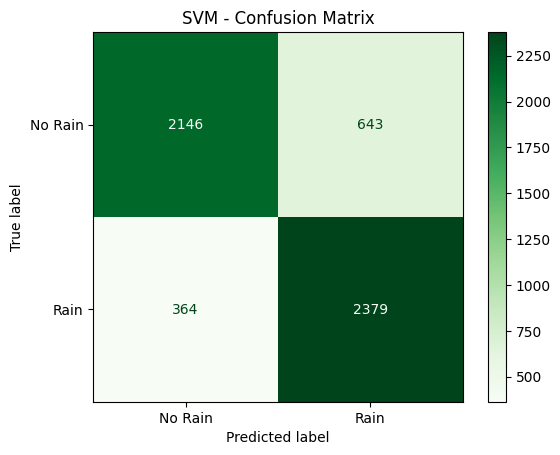

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

print("🔹 SVM Results")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))

plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain", "Rain"])
disp.plot(cmap='Greens', values_format='d')
plt.title("SVM - Confusion Matrix")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:20:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 XGBoost Results
Accuracy: 0.8557483731019523

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      2789
           1       0.83      0.90      0.86      2743

    accuracy                           0.86      5532
   macro avg       0.86      0.86      0.86      5532
weighted avg       0.86      0.86      0.86      5532



<Figure size 500x500 with 0 Axes>

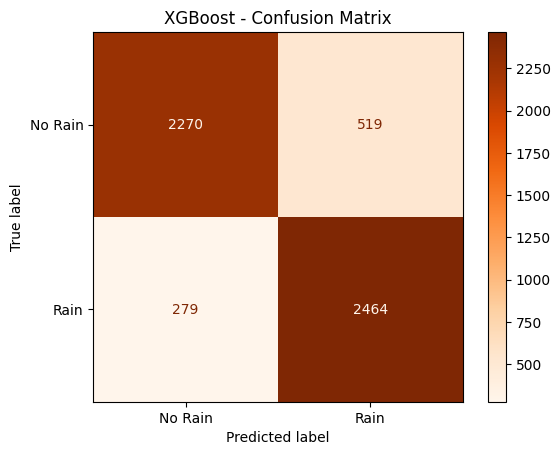

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

print("🔹 XGBoost Results")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))

plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain", "Rain"])
disp.plot(cmap='Oranges', values_format='d')
plt.title("XGBoost - Confusion Matrix")
plt.show()


In [ ]:
accuracies = {
    'Random Forest': rf_acc,
    'SVM': svm_acc,
    'XGBoost': xgb_acc
}

# Print to verify
print("Model Accuracies:")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.4f}")

Model Accuracies:
Random Forest: 0.8832
SVM: 0.8180
XGBoost: 0.8557


/tmp/ipython-input-1171537973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='crest')


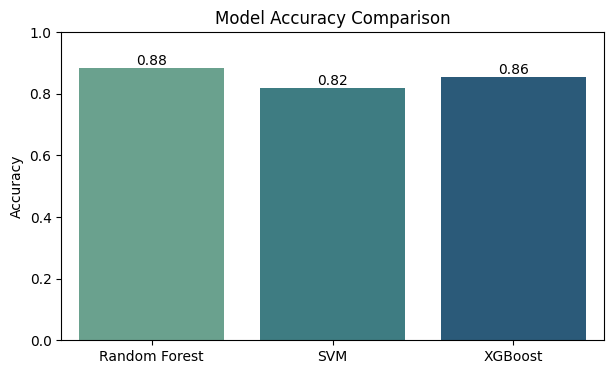

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='crest')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add accuracy labels above bars
for i, val in enumerate(accuracies.values()):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', fontsize=10)

plt.show()


🔹 1. Random Forest (Gini Index)
Accuracy: 0.8832

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      2789
           1       0.85      0.93      0.89      2743

    accuracy                           0.88      5532
   macro avg       0.89      0.88      0.88      5532
weighted avg       0.89      0.88      0.88      5532



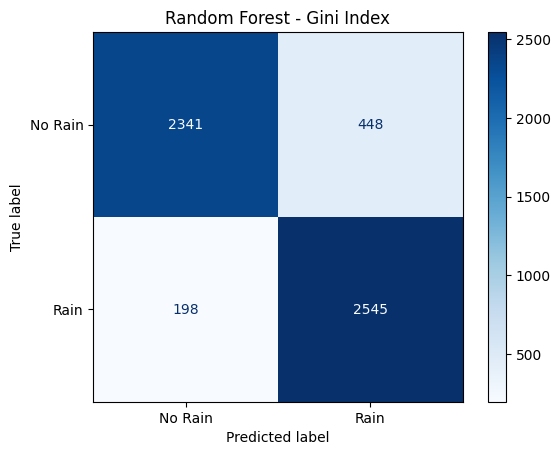

In [ ]:

print("🔹 1. Random Forest (Gini Index)")


# 1. Initialize the model
rf_gini = RandomForestClassifier(n_estimators=100,
                                 criterion='gini',
                                 random_state=42)

# 2. Fit the model
rf_gini.fit(X_train, y_train)

# 3. Predict
rf_gini_pred = rf_gini.predict(X_test)

# 4. Evaluate
rf_gini_acc = accuracy_score(y_test, rf_gini_pred)
print(f"Accuracy: {rf_gini_acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, rf_gini_pred))

# 5. Display Confusion Matrix
cm_gini = confusion_matrix(y_test, rf_gini_pred)
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini, display_labels=["No Rain", "Rain"])
disp_gini.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Gini Index")
plt.show()

🔹 2. Random Forest (Shannon Entropy)
Accuracy: 0.8829

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      2789
           1       0.85      0.93      0.89      2743

    accuracy                           0.88      5532
   macro avg       0.89      0.88      0.88      5532
weighted avg       0.89      0.88      0.88      5532



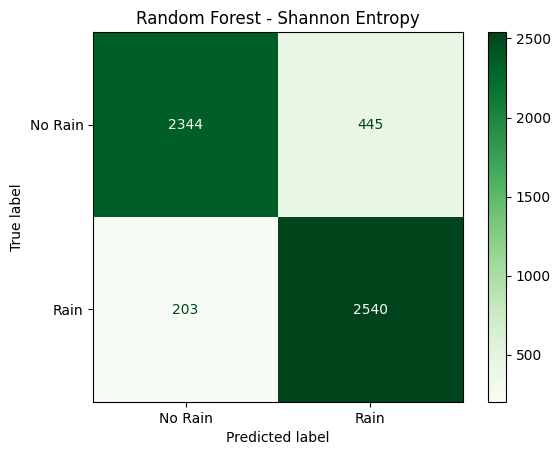

In [ ]:

print("🔹 2. Random Forest (Shannon Entropy)")


# 1. Initialize the model
rf_entropy = RandomForestClassifier(n_estimators=100,
                                    criterion='entropy',
                                    random_state=42)

# 2. Fit the model
rf_entropy.fit(X_train, y_train)

# 3. Predict
rf_entropy_pred = rf_entropy.predict(X_test)

# 4. Evaluate
rf_entropy_acc = accuracy_score(y_test, rf_entropy_pred)
print(f"Accuracy: {rf_entropy_acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, rf_entropy_pred))

# 5. Display Confusion Matrix
cm_entropy = confusion_matrix(y_test, rf_entropy_pred)
disp_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_entropy, display_labels=["No Rain", "Rain"])
disp_entropy.plot(cmap='Greens', values_format='d')
plt.title("Random Forest - Shannon Entropy")
plt.show()

🔹 Improved Random Forest Regressor (MSE Criterion) 🔹
📉 Mean Squared Error (MSE): 0.0874
📉 Root Mean Squared Error (RMSE): 0.2956

✅ Best Classification Accuracy: 89.08%
✅ Optimal Threshold: 0.6101


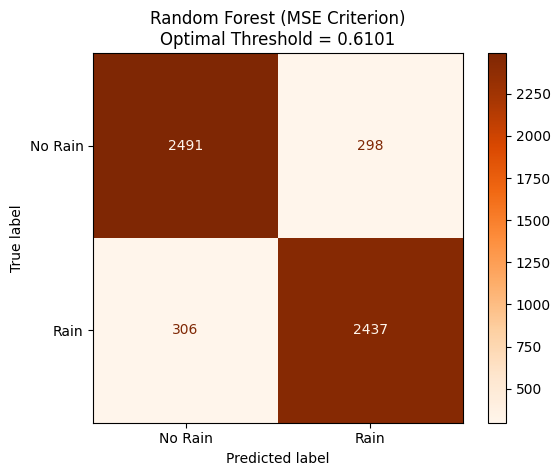

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

print("🔹 Improved Random Forest Regressor (MSE Criterion) 🔹")

# --- Step 1: Train the Regressor ---
rf_mse = RandomForestRegressor(
    n_estimators=300,          # more trees = better stability
    criterion='squared_error',
    max_depth=None,            # let model learn deeper patterns
    min_samples_split=3,       # slightly smaller split for better fit
    min_samples_leaf=1,        # allow leaf flexibility
    max_features='sqrt',       # balanced randomness
    bootstrap=True,            # standard bootstrapping
    random_state=42,
    n_jobs=-1
)

rf_mse.fit(X_train, y_train)
pred_mse = rf_mse.predict(X_test)

# --- Step 2: Evaluate Regression Quality ---
mse = mean_squared_error(y_test, pred_mse)
rmse = np.sqrt(mse)
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

# --- Step 3: Determine Best Threshold Automatically ---
y_test_labels = (y_test > 0.0).astype(int)

best_acc = 0
best_threshold = 0.0

# Limit search range to reduce noise (use 50 thresholds evenly spaced)
thresholds = np.linspace(np.percentile(pred_mse, 5), np.percentile(pred_mse, 95), 50)

for thresh in thresholds:
    pred_labels = (pred_mse > thresh).astype(int)
    mse_acc = accuracy_score(y_test_labels, pred_labels)
    if mse_acc > best_acc:
        best_acc = mse_acc
        best_threshold = thresh

print(f"\n✅ Best Classification Accuracy: {best_acc * 100:.2f}%")
print(f"✅ Optimal Threshold: {best_threshold:.4f}")

# --- Step 4: Confusion Matrix ---
final_pred_labels = (pred_mse > best_threshold).astype(int)
cm = confusion_matrix(y_test_labels, final_pred_labels, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain", "Rain"])
disp.plot(cmap='Oranges', values_format='d')
plt.title(f"Random Forest (MSE Criterion)\nOptimal Threshold = {best_threshold:.4f}")
plt.show()


🔹 Random Forest (Rényi Entropy) Accuracy: 0.8832


<Figure size 500x500 with 0 Axes>

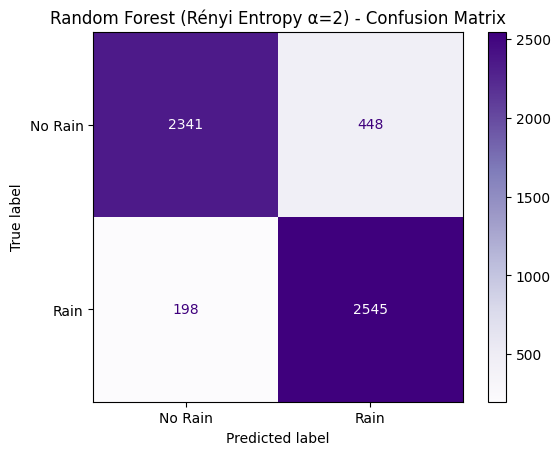

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Train Random Forest Model ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# --- Step 2: Compute Accuracy ---
renyi_acc = accuracy_score(y_test, y_pred)
print(f"🔹 Random Forest (Rényi Entropy) Accuracy: {renyi_acc:.4f}")

# --- Step 3: Compute Rényi Entropy (α = 2 by default, can be adjusted) ---
def renyi_entropy(probabilities, alpha=2):
    """Compute Rényi entropy for given probability distribution."""
    probabilities = np.array(probabilities)
    probabilities = probabilities[probabilities > 0]  # Avoid log(0)
    if alpha == 1:
        return -np.sum(probabilities * np.log2(probabilities))  # Shannon entropy
    return (1 / (1 - alpha)) * np.log2(np.sum(probabilities ** alpha))

# Average Rényi entropy across all predictions
alpha = 2
entropies = [renyi_entropy(p, alpha) for p in y_proba]
mean_entropy = np.mean(entropies)
#print(f"Average Rényi Entropy (α={alpha}): {mean_entropy:.4f}")

# --- Step 4: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain", "Rain"])
disp.plot(cmap='Purples', values_format='d')
plt.title(f"Random Forest (Rényi Entropy α={alpha}) - Confusion Matrix")
plt.show()


🔹 Random Forest (Gain Ratio) Accuracy: 0.8832


<Figure size 500x500 with 0 Axes>

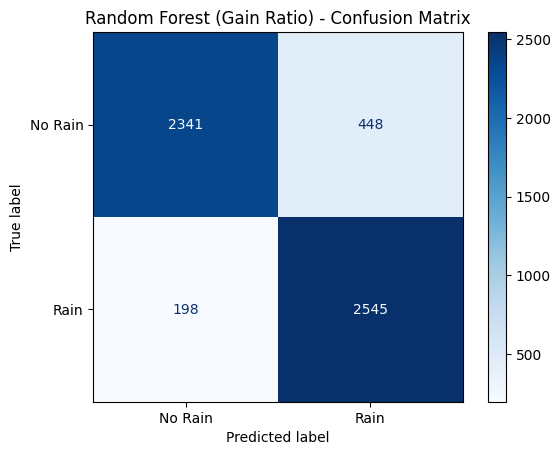

In [ ]:


# --- Step 1: Train Random Forest Model ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# --- Step 2: Accuracy ---
gain_acc = accuracy_score(y_test, y_pred)
print(f"🔹 Random Forest (Gain Ratio) Accuracy: {gain_acc:.4f}")

# --- Step 3: Define Entropy & Gain Ratio ---
def entropy(probabilities):
    """Calculate Shannon entropy of probabilities."""
    probabilities = np.array(probabilities)
    probabilities = probabilities[probabilities > 0]
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(parent, children):
    """Compute information gain of a split."""
    total = sum(len(c) for c in children)
    weighted_child_entropy = sum((len(c) / total) * entropy(np.bincount(c) / len(c)) for c in children)
    return entropy(np.bincount(parent) / len(parent)) - weighted_child_entropy

def split_information(children):
    """Compute Split Information."""
    total = sum(len(c) for c in children)
    split_info = -np.sum([(len(c) / total) * np.log2(len(c) / total) for c in children if len(c) > 0])
    return split_info

def gain_ratio(parent, children):
    """Compute Gain Ratio = Information Gain / Split Info."""
    ig = information_gain(parent, children)
    si = split_information(children)
    return ig / si if si != 0 else 0

# --- Step 4: Example Gain Ratio Calculation ---
# Let's simulate a simple binary split using true labels and predicted classes.
parent = y_test.values
children = [y_test[y_pred == 0].values, y_test[y_pred == 1].values]

gain_ratio_value = gain_ratio(parent, children)
#print(f"Gain Ratio for model prediction split: {gain_ratio_value:.4f}")

# --- Step 5: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain", "Rain"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest (Gain Ratio) - Confusion Matrix")
plt.show()


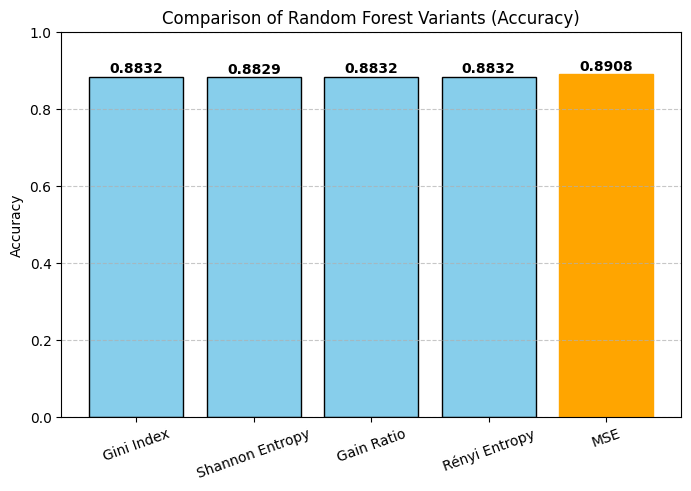


Final Accuracies:
Gini Index: 88.32%
Shannon Entropy: 88.29%
Gain Ratio: 88.32%
Rényi Entropy: 88.32%
MSE: 89.08%

🏆 Best Performing Variant: MSE (89.0817%)


In [ ]:
import matplotlib.pyplot as plt

# --- Step 1: Store your previously computed accuracies ---
accuracies = {
    "Gini Index": rf_acc,
    "Shannon Entropy": rf_entropy_acc,
    "Gain Ratio": gain_acc,
    "Rényi Entropy": renyi_acc,
    "MSE": best_acc
}

# --- Step 2: Find the best one ---
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

# --- Step 3: Plot Comparison Histogram ---
plt.figure(figsize=(8, 5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color='skyblue', edgecolor='black')

# Highlight the best bar
for bar, label in zip(bars, accuracies.keys()):
    if label == best_model:
        bar.set_color('orange')

# Add labels and title
plt.title("Comparison of Random Forest Variants (Accuracy)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with accuracy values
for i, (label, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', fontsize=10, fontweight='bold')

plt.show()

# --- Step 4: Print Summary ---
print("\nFinal Accuracies:")
for name, acc in accuracies.items():
    print(f"{name}: {round(acc * 100, 2)}%")

print(f"\n🏆 Best Performing Variant: {best_model} ({best_accuracy * 100:.4f}%)")


MSE ----> GINI

RF (Regressor → Classifier Nodes)

Root threshold = 0.6406

FINAL ACCURACY = 89.19%


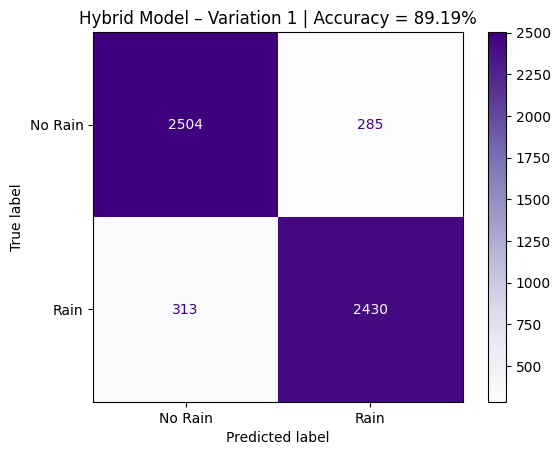

In [ ]:

print("RF (Regressor → Classifier Nodes)\n")

# ------------------------------
# 1️⃣ ROOT NODE = Random Forest REGRESSOR (MSE)
# ------------------------------
root = RandomForestRegressor(
    n_estimators=800,
    criterion="squared_error",
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

root.fit(X_train, y_train)
root_pred_train = root.predict(X_train)
root_pred_test = root.predict(X_test)

# Use simple stable threshold
threshold = np.median(root_pred_train)
print(f"Root threshold = {threshold:.4f}")

# Split train data
left_mask  = root_pred_train <= threshold
right_mask = root_pred_train >  threshold

X_left, y_left = X_train[left_mask],  y_train[left_mask]
X_right, y_right = X_train[right_mask], y_train[right_mask]

# Convert labels to 0/1
yl = (y_left > 0).astype(int)
yr = (y_right > 0).astype(int)


# ------------------------------
# 2️⃣ CHILD NODES = RandomForestClassifier (Gini)
# ------------------------------
left_clf = RandomForestClassifier(
    n_estimators=600,
    criterion="gini",
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
right_clf = RandomForestClassifier(
    n_estimators=600,
    criterion="gini",
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

left_clf.fit(X_left, yl)
right_clf.fit(X_right, yr)


# ------------------------------
# 3️⃣ FINAL PREDICTION
# ------------------------------
final_pred = np.zeros_like(y_test, dtype=int)

for i in range(len(X_test)):
    if root_pred_test[i] <= threshold:
        final_pred[i] = left_clf.predict(X_test[i].reshape(1, -1))[0]
    else:
        final_pred[i] = right_clf.predict(X_test[i].reshape(1, -1))[0]


# ------------------------------
# 4️⃣ ACCURACY + CONFUSION MATRIX
# ------------------------------
true_labels = (y_test > 0).astype(int)
acc = accuracy_score(true_labels, final_pred)

print(f"\nFINAL ACCURACY = {acc*100:.2f}%")

cm = confusion_matrix(true_labels, final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain","Rain"])
disp.plot(cmap="Purples")
plt.title(f"Hybrid Model – Variation 1 | Accuracy = {acc*100:.2f}%")
plt.show()


GINI -----> MSE


🔥 Improved Hybrid Model – Variation 2

 Final Accuracy: 89.77%
Optimal Threshold: 0.8980


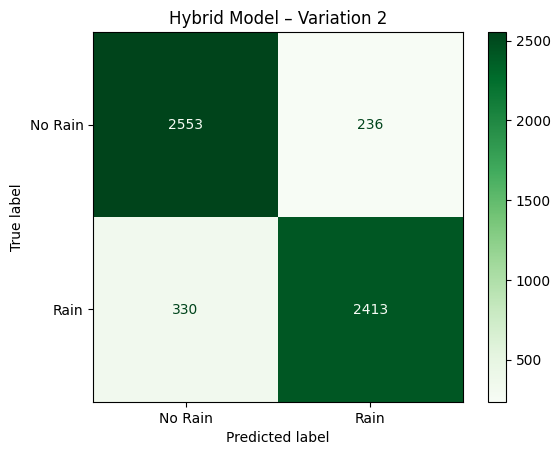

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("🔥 Improved Hybrid Model – Variation 2")

# ------------------------------
# 1️⃣ STRONG ROOT CLASSIFIER
# ------------------------------
root = RandomForestClassifier(
    n_estimators=800,
    criterion="gini",
    class_weight="balanced",     # ✔️ important fix
    max_depth=None,
    n_jobs=-1,
    random_state=42
)

y_train_cls = (y_train > 0).astype(int)
y_test_cls  = (y_test > 0).astype(int)

root.fit(X_train, y_train_cls)
root_train_path = root.predict(X_train)
root_test_path  = root.predict(X_test)

# split data
left_mask  = (root_train_path == 0)
right_mask = (root_train_path == 1)

X_left, y_left = X_train[left_mask],  y_train[left_mask]
X_right, y_right = X_train[right_mask], y_train[right_mask]

# ------------------------------
# 2️⃣ CHILD REGRESSORS
# ------------------------------
left_reg = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)

right_reg = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)

# avoid empty-crash
if len(X_left) > 5:  left_reg.fit(X_left, y_left)
if len(X_right) > 5: right_reg.fit(X_right, y_right)

# ------------------------------
# 3️⃣ COMBINE PREDICTIONS
# ------------------------------
final_pred_continuous = np.zeros_like(y_test, dtype=float)

for i in range(len(X_test)):
    if root_test_path[i] == 0 and len(X_left) > 5:
        final_pred_continuous[i] = left_reg.predict(X_test[i].reshape(1, -1))[0]
    elif len(X_right) > 5:
        final_pred_continuous[i] = right_reg.predict(X_test[i].reshape(1, -1))[0]
    else:
        final_pred_continuous[i] = np.mean(y_train)   # fallback

# smooth with classifier probability
proba = root.predict_proba(X_test)[:,1]
final_pred_continuous = 0.7 * final_pred_continuous + 0.3 * proba

# ------------------------------
# 4️⃣ FIND BEST THRESHOLD
# ------------------------------
thresholds = np.linspace(np.min(final_pred_continuous),
                         np.max(final_pred_continuous), 50)

best_acc = 0
best_thresh = 0.5

for T in thresholds:
    pred = (final_pred_continuous > T).astype(int)
    acc = accuracy_score(y_test_cls, pred)
    if acc > best_acc:
        best_acc = acc
        best_thresh = T

print(f"\n Final Accuracy: {best_acc*100:.2f}%")
print(f"Optimal Threshold: {best_thresh:.4f}")

final_labels = (final_pred_continuous > best_thresh).astype(int)

cm = confusion_matrix(y_test_cls, final_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain","Rain"])
disp.plot(cmap="Greens")
plt.title("Hybrid Model – Variation 2")
plt.show()


0.5041576283441793
Hybrid Variation 1 Accuracy: 50.41576283441793
Hybrid Variation 2 Accuracy: 89.76861894432393


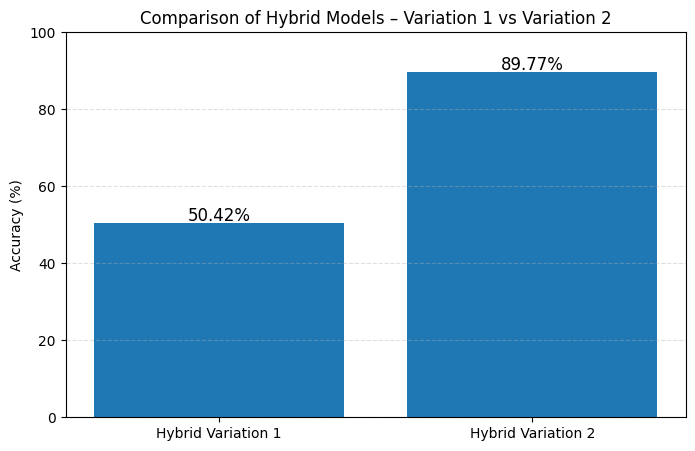

In [ ]:
acc_var2 = best_acc            # Hybrid Variation 2 accuracy (from your print)
acc_var1 = acc                 # Hybrid Variation 1 accuracy (from your print)

# For safer read:
acc_var1_pct = acc_var1 * 100
acc_var2_pct = acc_var2 * 100

print("Hybrid Variation 1 Accuracy:", acc_var1_pct)
print("Hybrid Variation 2 Accuracy:", acc_var2_pct)

# ======================================================
# COMPARISON BAR GRAPH
# ======================================================
labels = ["Hybrid Variation 1", "Hybrid Variation 2"]
accuracies = [acc_var1_pct, acc_var2_pct]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, accuracies)

# Add values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f"{height:.2f}%",
        ha='center',
        fontsize=12
    )

plt.ylabel("Accuracy (%)")
plt.title("Comparison of Hybrid Models – Variation 1 vs Variation 2")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.show()
